# Chapter 0 : Machine Learning Intuition

In [2]:
#!/usr/bin/env python3
from traitlets.config.manager import BaseJSONConfigManager
from pathlib import Path
path = Path.home() / ".jupyter" / "nbconfig"
cm = BaseJSONConfigManager(config_dir=str(path))
cm.update(
    "rise",
    {
        "theme": "sky",
        "transition": "zoom",
        "start_slideshow_at": "selected",
     }
)

{'theme': 'sky', 'transition': 'zoom', 'start_slideshow_at': 'selected'}

 ## Supervised And Unsupervised
 
<img src="https://lakshaysuri.files.wordpress.com/2017/03/sup-vs-unsup.png?w=648">

## Supervised Machine Learning

## Linear Regression With One Variable



Hypothesis = $h(x) = \Theta + \Theta_1 x $


## Linear Regression With One Variable Cost Function

The cost function $J$ for a particular choice of parameters θ is the mean squared error (MSE):

\begin{equation*}
J(\theta) = \frac{1}{m} \sum_{i=1}^{m}(h_\theta(x^{(i)})-y^{i})^2 
\end{equation*}


$m$       = The number of training example  
$x^{(i)}$ = The input vector for the $i^{th}$ training example  
$y^{(i)}$ = The class label for the $i^{th}$ training example  
$\theta$  = The chosen parameter values or "weights" $(\theta_0,\theta_1,\theta_2)$ 


# Chapter 1 : Basic Linear

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/matplotlib/font_manager.py:229: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '


In [25]:
q = 10
print(q)

10


In [78]:
class model:
    def __init__(self):
        self.thetas = np.random.uniform(low=-5,high=10,size=2)
    
    def evaluate(self,x):
        return self.thetas[0] + self.thetas[1]*x
    
    def get_thetas(self):
        return self.thetas
    
    def set_thetas(self,_thetas):
        self.thetas = _thetas
    
    def get_plot_data(self):
        x = np.linspace(0, 20, 1000)
        f = lambda x : self.thetas[0] + self.thetas[1]*x
        return x, self.evaluate(x)
    


In [41]:
def MSE(y_pred,y_ground):
    res = np.sum((np.power(y_pred - y_ground,2)))/(2*y_pred.size)
    return res

In [57]:
def gradient_descent(m: model, x_data, y_data,alpha: int):
    '''
    m : model
    alpha : learning rate
    '''
    y_pred = m.evaluate(x_data)
    old_thetas = m.get_thetas()
    new_thetas = np.empty(old_thetas.size)
    
    new_thetas[0] = alpha * np.sum(y_pred - y_data)/(y_pred.size)
    new_thetas[1] = alpha * np.sum((y_pred - y_data)* x_data)/(y_pred.size) 
    new_thetas = old_thetas - new_thetas
    
    m.set_thetas(new_thetas)

In [104]:
print(x_data)
print("Starting thetas : ",m.thetas)
print("Expected thetas : ",bias, " ", grad)
for i in range(200):
    if i%20 == 0:
        print(MSE(m.evaluate(x_data),y_data))
    gradient_descent(m,x_data,y_data,0.01)
    #print("loop ",i , " thetas : ", m.thetas)

print("After thetas : ",m.thetas)




[ 8.97708767 11.17811605 10.78067258  7.09331056 10.29459753 14.74988183
  6.25836511  5.26806425  9.60578436  9.92188891  8.60738735 12.66096023
 10.61729961 14.94673125 13.05812492 13.69226902  5.88386396  7.75065399
 10.91786681  8.43443253 14.21959588  5.85763114 13.90897224  8.16098282
  9.86273431 11.53096102  9.70667202 12.26781799  8.94855662  7.40351662]
Starting thetas :  [6.00679315 2.2298714 ]
Expected thetas :  6.250112485161966   2.1516682731762238
1.640907982763476
1.6408501649132552
1.6407938799973247
1.6407390873727477
1.6406857474741545
1.640633821785179
1.6405832728106435
1.6405340640494919
1.6404861599684217
1.6404395259762328
After thetas :  [6.02935199 2.22778484]


In [79]:
#Generate Data
x_data, y_data, grad, bias = generate_data()

f = lambda x, grad, bias: grad*x+bias
x = np.linspace(0, 20, 1000)
y = f(x,grad,bias)

x_base = np.linspace(0, 20, 1000)
y_base = np.linspace(0, 50, 1000)

m = model()
x_model, y_model = m.get_plot_data()




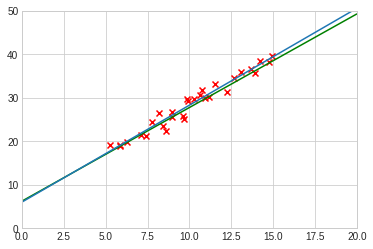

In [105]:
x_model, y_model = m.get_plot_data()

fig = plt.figure()
ax = plt.axes()

ax.set_ylim(bottom=0,top=50)
ax.set_xlim(left=0,right=20)
ax.plot(x, y,c='green');
# ax.plot(x_base,y_base)
ax.plot(x_model,y_model)
ax.scatter(x_data, y_data,marker="x",c="red")

In [83]:
x_data, y_data, grad, bias = generate_data()
np.savetxt('x.txt', x_data)  
np.savetxt('y.txt', x_data)  

In [4]:
import numpy as np

def generate_data():
    grad = np.random.uniform(low=1,high=3,size=1)[0]
    bias =  np.random.uniform(low=0,high=10,size=1)[0]
#     print(grad)
#     print(bias)
    f = lambda x,grad,bias,penality,logit: grad*x+bias+(penality*logit)
    logit = lambda x : 1 / (1 + np.power((x/(1-x)),2) )
    norm = lambda x: np.abs(x - 10)/10
    x = np.random.uniform(low=5,high=15,size=30)
    x_logit = logit(norm(x))
#     print(sigmoid(x))
    penality = np.random.uniform(low=-3,high=3,size=30)

    return x , f(x,grad,bias,penality,x_logit), grad, bias,

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/ipykernel/__main__.py:1: RuntimeWarning: divide by zero encountered in true_divide
  if __name__ == '__main__':


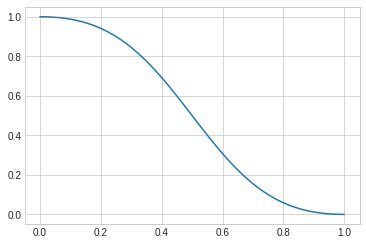

In [10]:
logit = lambda x : 1 / (1 + np.power((x/(1-x)),2) )
x = np.linspace(0, 1, 50)
# print(x)
# print(logit(x))

%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np

fig = plt.figure()
ax = plt.axes()

ax.plot(x, logit(x))

In [12]:
norm = lambda x: np.abs(x - 10)/10
x = np.random.uniform(low=5,high=15,size=30)
print(x)
print(norm(x))

[13.30391579 12.65512299  8.43485973 11.814641    7.87204986  6.18952057
 14.29756016 11.66869977 10.56550721  9.71993903 14.80234608 10.89791784
 14.92452754 13.98689045  8.5298043  13.28518861  9.32588511 10.71785765
 11.25531137 10.61064078 14.16269719 11.11591031 13.09022456 14.06660388
 13.95366688  8.57260778 11.13866428 12.60938342  6.41419606 14.04876444]
[0.33039158 0.2655123  0.15651403 0.1814641  0.21279501 0.38104794
 0.42975602 0.16686998 0.05655072 0.0280061  0.48023461 0.08979178
 0.49245275 0.39868904 0.14701957 0.32851886 0.06741149 0.07178576
 0.12553114 0.06106408 0.41626972 0.11159103 0.30902246 0.40666039
 0.39536669 0.14273922 0.11386643 0.26093834 0.35858039 0.40487644]


In [30]:
generate_data()

[0.38264825 0.50153896 0.38689835 0.59998211 0.59025753 0.56904706
 0.496424   0.59730688 0.44320399 0.56600377 0.51255325 0.59468893
 0.547844   0.43764419 0.39737256 0.52171758 0.60098804 0.54094104
 0.42771431 0.47956805 0.42451346 0.41753974 0.60970501 0.38323795
 0.4997289  0.42741688 0.48585059 0.3882652  0.5852717  0.52230991]


(array([ 5.21677194, 10.0615585 ,  5.39631252, 14.05390567, 13.65030103,
        12.77964251,  9.85695769, 13.94256224,  7.71831192, 12.6556491 ,
        10.50223563, 13.83383633, 11.9196333 ,  7.49271464,  5.83575113,
        10.86925001, 14.09583628, 11.6413165 ,  7.08817161,  9.18226661,
         6.95727862,  6.6711876 , 14.46072415,  5.24172774,  9.9891562 ,
         7.07601935,  9.43387263,  5.45389751, 13.44452576, 10.89298946]),
 array([20.79375888, 25.51786866, 15.65360891, 38.14888212, 33.62290229,
        29.05316507, 22.52495968, 40.16434926, 26.82255193, 37.7115849 ,
        28.03099987, 39.62760906, 32.55647564, 18.69594052, 20.02780459,
        24.84585575, 36.71443136, 27.9114012 , 19.96976048, 23.50480893,
        17.96948291, 18.42482527, 37.25289895, 14.39714692, 30.44517828,
        21.20609439, 28.42594833, 19.96949501, 39.38303715, 31.83867499]))

 <img src="img/vandiagram.PNG"  width="500">
 
 

## Scalars, Vectors, Matrices and Tensors

**Scalar:** is just a single number

\begin{equation*}
s \in \mathbb{R} 
\end{equation*}
**Vector:** A vector is an array of numbers.

\begin{equation*}
x =  \left[
\begin{matrix}
 x_1 \\
 x_2 \\
 \vdots \\
x_n \\ 
\end{matrix}
\right]
\end{equation*}

**Matrices:** A matrix is a 2-D array of numbers

\begin{equation*}
A = \begin{bmatrix}
A_1,_1 & A_1,_2 & A_1,_3\\ 
A_2,_1 & A_2,_2 & A_2,_3
\end{bmatrix}
\end{equation*}


In [1]:
!pip freeze

absl-py==0.8.1
adal==1.2.2
alabaster==0.7.11
altair==3.2.0
anaconda-client==1.7.2
anaconda-navigator==1.9.2
anaconda-project==0.8.2
ansiwrap==0.8.4
antlr4-python3-runtime==4.7.2
appdirs==1.4.3
applicationinsights==0.11.9
argcomplete==1.10.0
arrow==0.15.4
asn1crypto==0.24.0
astor==0.8.0
astroid==2.0.4
astropy==3.0.4
atomicwrites==1.2.1
attrs==18.2.0
Automat==0.7.0
azure==4.0.0
azure-applicationinsights==0.1.0
azure-batch==4.1.3
azure-cli-core==2.0.54
azure-cli-nspkg==3.0.4
azure-cli-telemetry==1.0.4
azure-common==1.1.23
azure-cosmosdb-nspkg==2.0.2
azure-cosmosdb-table==1.0.6
azure-datalake-store==0.0.48
azure-eventgrid==1.3.0
azure-graphrbac==0.40.0
azure-keyvault==1.1.0
azure-kusto-data==0.0.38
azure-kusto-ingest==0.0.38
azure-loganalytics==0.1.0
azure-mgmt==4.0.0
azure-mgmt-advisor==1.0.1
azure-mgmt-applicationinsights==0.1.1
azure-mgmt-authorization==0.50.0
azure-mgmt-batch==5.0.1
azure-mgmt-batchai==2.0.0
azure-mgmt-billing==0.2.0
azure-mgmt-cdn==3.1.0
azure-mgmt-cognitiveservices==

## Tensorflow Example 

## Chapter 2 : Linear Regression

In [3]:
import tensorflow as tf
tf.__version__

'2.0.0-beta1'

In [3]:
print(tf.add(1, 2))

tf.Tensor(3, shape=(), dtype=int32)


In [3]:
import numpy as np

ndarray = np.ones([3, 3])

print("TensorFlow operations convert numpy arrays to Tensors automatically")
tensor = tf.multiply(ndarray, 42)
print(tensor)


print("And NumPy operations convert Tensors to numpy arrays automatically")
print(np.add(tensor, 1))

print("The .numpy() method explicitly converts a Tensor to a numpy array")
print(tensor.numpy())

TensorFlow operations convert numpy arrays to Tensors automatically
tf.Tensor(
[[42. 42. 42.]
 [42. 42. 42.]
 [42. 42. 42.]], shape=(3, 3), dtype=float64)
And NumPy operations convert Tensors to numpy arrays automatically
[[43. 43. 43.]
 [43. 43. 43.]
 [43. 43. 43.]]
The .numpy() method explicitly converts a Tensor to a numpy array
[[42. 42. 42.]
 [42. 42. 42.]
 [42. 42. 42.]]


In [4]:
print("Is there a GPU available: "),
print(tf.config.experimental.list_physical_devices("GPU"))

Is there a GPU available: 
[]


In [39]:
import numpy as np

x = tf.random.uniform((1, 1))
print(x)
# with tf.GradientTape() as t:
#     t.watch(x)
#     y = tf.reduce_sum(x)
#     print(y)
#     z = tf.multiply(y, y)
#     print(z)
    

# Derivative of z with respect to the original input tensor x
# dz_dx = t.gradient(z, y)
# for i in [0, 1]:
#   for j in [0, 1]:
#     assert dz_dx[i][j].numpy() == 8.0
    
# print(dz_dx)

tf.Tensor([[0.8142122]], shape=(1, 1), dtype=float32)


In [37]:
 from collections import OrderedDict
    
a = ['c','a','r','t','w']

b = [1.0,2.0,3.3,10.5,9.1]

c = OrderedDict()


for d in zip(b,a):
    c[d[0]] = d[1]
    
print(list(c.keys()))
# print(a[2.0])
# count = 0
# for i in a:
#     if count == len(a)-2:
#         print(i)
#         break
#     count += 1

[1.0, 2.0, 3.3, 10.5, 9.1]


In [45]:
f = open('text_equ.txt')

equ = f.read()

x = 2

eval(equ)


7

In [44]:
import os
os.getcwd()

'/home/nbuser/library'